Name: Mansi Singhal
                              ,Roll no. : 2019370

In [1]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
import random
from decimal import * 
from math import isclose
import math as math
import cvxopt as opt
from cvxopt import blas, solvers

PROBLEM 1 

In [2]:
def func(x,gamma):
    return x[0,0]**2 + (gamma*(x[0,1]**2)) - (x[0,0]*x[0,1]) - x[0,0] - x[0,1]
#Function for calculating f(x1,x2) for question 1

In [15]:
#Implementation of gradient descent algorithm
def gradientD(stepsize,gamma,x):
    error = []
    i = 0 
    while True:
        i= i +1
        prev = func(x,gamma)
        a = x[0,0]- stepsize* (2*x[0,0] - x[0,1] -1)
        b = x[0,1] - stepsize* (2*gamma*x[0,1] - x[0,0] -1)
        x[0,0] = a
        x[0,1] = b
        err = abs(prev - func(x,gamma))
        error.append(err)
        #print(error)
        if (error[len(error)-1] == 0 or i>900):
        #if (isclose(0, error[len(error)-1], abs_tol=1e-8)):
            break
    return error,i

In [16]:
s = 0.1 #StepSize
g =1 #Gamma
x = np.matrix('5.0 5.0') #Initial Point
error1,i1 = gradientD(s,g,x)
print('Optimal value of x1:')
print(x[0,0])
print('Optimal value of x1:')
print(x[0,1])
print('Optimal value of f')
print(func(x,g))
print('Number of Iterations required:')
print(i1) 

Optimal value of x1:
1.000000020890758
Optimal value of x1:
1.000000020890758
Optimal value of f
-0.9999999999999996
Number of Iterations required:
181


Note: StepSize used is 0.1 and the initial point used is (5.0,5.0).

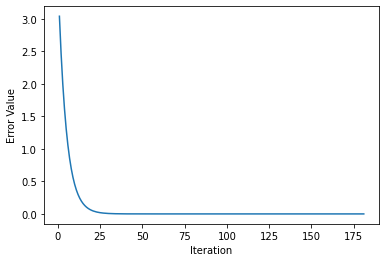

In [17]:
#1.1a
iterations = list(range(1,i1+1))
plt.plot(iterations,error1)
plt.xlabel('Iteration')
plt.ylabel('Error Value')
plt.show()

Inferences: We can see from the above graph that the error value reduces as the number of iterations of gradient descent increase. This implies that by every iteration of gradient descent, the error value is decreasing and coming close to zero. The error value becomes zero when the difference between function values before and after descent is 0, which implies that both the values are the same and we have reached the minima and the function cannot be minimised further. 

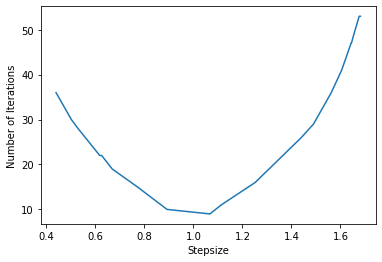

In [18]:
#1.1b
random_StepSizes = []
for q in range(20):
    random_StepSizes.append(random.uniform(0,2))
random_StepSizes.sort()
iteration2= []    
for q in range(20):
    #print(random_StepSizes[q])
    g =1
    x = np.matrix('5.0 5.0')
    e,it = gradientD(random_StepSizes[q],g,x)
    #print(it)
    ite = list(range(1,it+1))
    iteration2.append(it)
#print(random_StepSizes)
#print(iteration2)
plt.plot(random_StepSizes,iteration2)
plt.xlabel('Stepsize')
plt.ylabel('Number of Iterations')
plt.show()

Inferences: In the above graph, we can see that the Step size influences the number of iterations of gradient descent required to converge to the minimum. We chose random Step sizes from the interval [0,2] keeping the inital point as [5.0,5.0] and for this interval we can conclude that when the Step size is around 1, less number of iterations are required. And as the Step size moves away from 1, the number of iterations required increase.
    

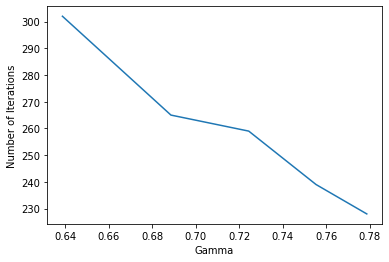

In [19]:
#1.1c
random_gamma = []
for q in range(5):
    random_gamma.append(random.uniform(0.5,1))
random_gamma.sort()
iteration2= []    
for q in range(5):
    x = np.matrix('5.0 5.0') #Initial Point
    e,it = gradientD(0.1,random_gamma[q],x)
    iteration2.append(it)
#print(random_gamma)
#print(iteration2)
plt.plot(random_gamma,iteration2)
plt.xlabel('Gamma')
plt.ylabel('Number of Iterations')
plt.show()

Inferences: In the above graph, we can notice that the number of iterations of gradient descent decrease as the value of Gamma increases in the iterval [0.5,1]. Less number of iterations will be required to reach the minimum when gamma is from 0.72 to 1 and more number of iterations will be required when gamma is from 0.5 to 0.70.

In [24]:
#1.2
s = 0.1 #StepSize
x = np.matrix('5.0 5.0') #Initial Point
error1,i1 = gradientD(s,-1,x) #Gamma is being passes as -1
#print(i1)
#print(error1)

[[1.39006972e+79 5.88842982e+79]]
2.8420571584060985e+159


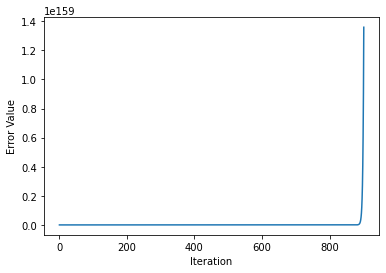

In [23]:
iterations1 = list(range(1,i1+1))
plt.plot(iterations1,error1)
plt.xlabel('Iteration')
plt.ylabel('Error Value')
print(x)
print(func(x,1))
plt.show()

Observations for 1.2: When Gammma is -1 in the function, the error values remain around 0 for the iterations in the beginning and then the error value starts increasing.This implies that by every iteration, we are moving away from the convergence instead of moving close to it, this is because negative value of gamma has made our function concave.

PROBLEM2

In [25]:
def func2(x):
    a = x[0] + 3*x[1] - 0.1
    b = x[0] - 3*x[1] - 0.1
    c = -x[0] - 0.1
    return (math.exp(a) + math.exp(b) + math.exp(c))

In [37]:
# Implementation of Newton’s method
def NewtonMethod(x):
    error = []
    i = 0 
    while True:
        i= i +1
        p_x = x
        prev = func2(x)
        #print(p_x)
        hessian = nd.Hessian(func2)
        h2 = hessian(x)
        h_inv= np.linalg.inv(h2)
        gradient = nd.Gradient(func2)(x)
        mul = h_inv@gradient
        mul1 = mul*1.205
        x = x - mul1
        #print(x)
        err = abs(prev - func2(x))
        #print(x)
        error.append(err)
        #print(error)
        if (p_x[0] == x[0] and p_x[1] == x[1]):
            break
    print('Optimal Value of x1')        
    print(x[0])
    print('Optimal Value of x2')        
    print(x[1])
    print('Optimal value of f')
    print(func2(x))
    

In [39]:
#2.1
x=np.array([2,1]) #Initial Point (2,1)
NewtonMethod(x)

Optimal Value of x1
-0.3465735902799737
Optimal Value of x2
-1.2201090704704366e-15
Optimal value of f
2.5592666966582156


In [40]:
#2.2
x1=np.array([-2,1]) #Initial Point (-2,1)
NewtonMethod(x1)

Optimal Value of x1
-0.34657359027997375
Optimal Value of x2
-1.4989427697077863e-16
Optimal value of f
2.5592666966582156


Update Rule used in the implementation of both the parts of this question is the same.
New_X = Old_X - (Inverse of Hessian Matrix at Old_X * Gradient Matrix at Old_X * Step Size).      The Step size is taken as 1.205. 


PROBLEM 3

In [41]:
#3.1
#Optimal Portfolio using Quadratic quations given n assets, a normal distribution, some target level of return.\
def Make_Portfolio(target,distribution,n):
    returns = np.matrix(distribution)
    P = (opt.matrix(np.cov(returns)))*target
    Q = opt.matrix(np.mean(returns, axis=1))
    #Constraint Matrices
    G = -opt.matrix(np.eye(n))  
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix([1.0])
    sol = solvers.qp(P,-Q, G, h, A, b)
    ri = np.sqrt(blas.dot(sol['x'], P*sol['x']))
    ret = blas.dot(Q,sol['x'])
    return sol['x'],ri,ret

In the above model, P stores the covariance matrix of the distribution multiplied by the targer level of return.
Q stores the p' = (p1',p2',.....pn') where pi' is the mean of the ith the prices of the ith asset.
The constraints for Markowitz portfolio optimization are as follows: 
1. wi ≥ 0 (i.e., no short positions), 
2. 1^T.x = B (B is the total budget to be invested, which is 1 in this model)
3. The overall return on the portfolio (ri in this model) should be more than a minimum acceptable return.
Matrices used for Constraints are:
G is an nxn negative identity matrix.
h is a matrix containing zeroes, it has n rows and 0 columns.
A is a matrix containing 1s it has 1 row and n columns.
b is a 1x1 matrix containing 1.

The library cvxopt has been used to solve this quadratic problem. The weight matrix, risk and return are calculated and returned for each function call.

In [47]:
#3.2
n = 20 #no of assets (given in question)
o = 5 #let us say that the no of observations is 5
distribution = np.random.randn(n,o) #Generating random normal distribution for n assets and o observations
weights,u,h= Make_Portfolio(50,distribution,20)
print(weights) #Weights

     pcost       dcost       gap    pres   dres
 0: -3.4537e+00 -2.2110e+00  7e+01  7e+00  5e+00
 1: -2.4123e-01 -2.0800e+00  2e+00  7e-15  1e-14
 2: -4.8627e-01 -1.0409e+00  6e-01  2e-15  3e-15
 3: -7.9911e-01 -9.3947e-01  1e-01  7e-17  3e-15
 4: -8.5279e-01 -8.7775e-01  2e-02  2e-16  3e-15
 5: -8.6641e-01 -8.6683e-01  4e-04  1e-16  3e-15
 6: -8.6666e-01 -8.6667e-01  4e-06  2e-16  3e-15
 7: -8.6667e-01 -8.6667e-01  4e-08  7e-18  4e-15
Optimal solution found.
[ 6.12e-02]
[ 1.28e-09]
[ 2.34e-09]
[ 3.97e-09]
[ 8.16e-10]
[ 1.33e-09]
[ 9.63e-10]
[ 6.58e-01]
[ 1.39e-09]
[ 4.82e-02]
[ 7.89e-10]
[ 1.80e-01]
[ 6.94e-09]
[ 5.26e-02]
[ 1.17e-09]
[ 1.81e-09]
[ 1.18e-09]
[ 2.90e-09]
[ 1.24e-09]
[ 2.17e-09]



     pcost       dcost       gap    pres   dres
 0: -3.4604e+00 -2.2171e+00  7e+01  7e+00  5e+00
 1: -2.4840e-01 -2.0856e+00  2e+00  1e-14  4e-15
 2: -5.0871e-01 -1.0675e+00  6e-01  4e-15  1e-15
 3: -8.4238e-01 -9.9662e-01  2e-01  2e-16  1e-15
 4: -9.0666e-01 -9.1740e-01  1e-02  1e-16  1e-15
 5: -9.1170e-01 -9.1220e-01  5e-04  2e-16  2e-15
 6: -9.1197e-01 -9.1198e-01  7e-06  3e-16  1e-15
 7: -9.1198e-01 -9.1198e-01  7e-08  1e-16  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.4659e+00 -2.2220e+00  7e+01  7e+00  5e+00
 1: -2.5402e-01 -2.0895e+00  2e+00  5e-15  3e-15
 2: -5.2775e-01 -1.0695e+00  5e-01  1e-15  7e-16
 3: -8.7160e-01 -1.0167e+00  1e-01  2e-16  7e-16
 4: -9.3705e-01 -9.4606e-01  9e-03  2e-16  8e-16
 5: -9.4262e-01 -9.4283e-01  2e-04  8e-17  9e-16
 6: -9.4279e-01 -9.4279e-01  2e-06  2e-16  1e-15
 7: -9.4279e-01 -9.4279e-01  2e-08  2e-16  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.4604e+00 -2.2171e

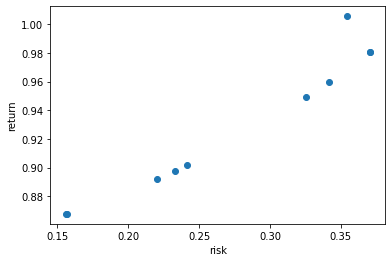

In [48]:
#3.3
#Taking 10 random target levels of return for the same model
returns = []
risks = []
i=0
while(i<10):
    w,a,b = Make_Portfolio(random.randint(10,100),distribution,20)
    risks.append(a)
    returns.append(b)
    i=i+1
plt.scatter(risks,returns)
plt.xlabel('risk')
plt.ylabel('return')
plt.show()